### Semantic segmentation with U-Net architecture on CARLA dataset. A solution for ['Semantic Segmentation for Self Driving Cars'](https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge) challenge on kaggle.

In [25]:
import os
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [26]:
HEIGHT = 256
WIDTH = 256
CHANNELS = 3
N_CLASSES = 13
BATCH_SIZE = 32
EPOCHS = 100

In [27]:
dir_path = '../input/lyft-udacity-challenge'

In [28]:
images_names = []
mask_names = []

for i in ['A', 'B', 'C', 'D', 'E']:
    
    images_names.extend(glob.glob(os.path.join(dir_path, f'data{i}/data*/CameraRGB/*.png')))
    mask_names.extend(glob.glob(os.path.join(dir_path, f'data{i}/data*/CameraSeg/*.png')))

n_samples = len(images_names)
n_samples
# print(type(glob.glob(os.path.join(dir_path, f'data{i}/data*/CameraRGB/*.png'))))

5000

In [29]:
train_images, val_images, train_masks, val_masks = train_test_split(images_names, mask_names, test_size = 0.2, random_state = 0)

In [35]:
class  DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, image_filenames, mask_filenames, batch_size = BATCH_SIZE, shuffle = True):
        self.image_filenames = image_filenames
        self.mask_filenames = mask_filenames
        self.filenames = list(zip(image_filenames, mask_filenames))
        self.batch_size = BATCH_SIZE
        self.shuffle = shuffle
    
    def __len__(self):
        print('len called.')
        return (len(self.image_filenames) // self.batch_size)
    
    def __getitem__(self, idx):
        print('getitem called.')
        batch = self.filenames[idx * self.batch_size : (idx + 1) * self.batch_size]
        X, y = self.__data_generation(batch)
        return X, y
    
    def on_epoch_end(self):
        print('on_epoch_end called.')
        self.indexes = np.arange(len(self.image_filenames))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
    def __data_generation(self, batch):
        print('data_generation called.')
        images = []
        segments = []
        
        for img_file, mask_file in batch:
            image = cv2.imread(img_file)
            image = cv2.resize(image, (WIDTH, HEIGHT))
            image = tf.image.convert_image_dtype(image, tf.float32)
            
            mask = cv2.imread(mask_file)
            mask = cv2.resize(mask, (WIDTH, HEIGHT))[:, :, 2]

            images.append(image)
            segments.append(mask)
            
        return np.array(images), np.array(segments)
    
  

In [36]:
train_generator = DataGenerator(train_images, train_masks)
val_generator = DataGenerator(val_images, val_masks)

In [37]:
for x, y in train_generator:
    break
x.shape, y.shape

len called.
getitem called.
data_generation called.


((32, 256, 256, 3), (32, 256, 256))

Text(0.5, 1.0, 'Segmentation')

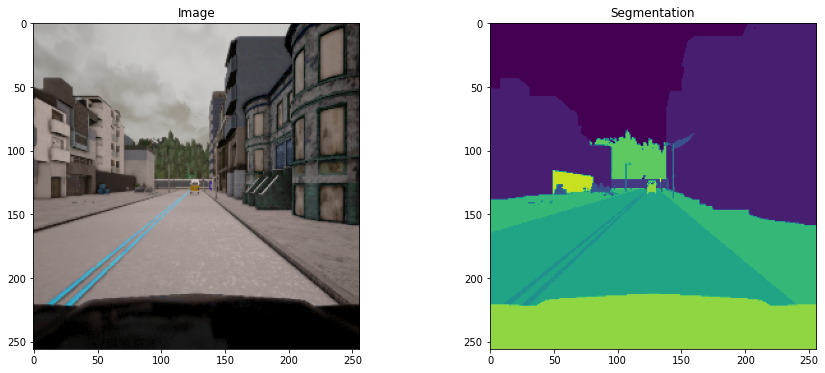

In [38]:
fig, arr = plt.subplots(1,2, figsize=(15, 6))
arr[0].imshow(x[10])
arr[0].set_title('Image')
arr[1].imshow(y[10])
arr[1].set_title('Segmentation')